Dataset shape: (380, 108)
Available columns: Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'H_Ranking_Prior_Season',
       'A_Ranking_Prior_Season', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF'],
      dtype='object')

First few rows:
   Div        Date   Time        HomeTeam       AwayTeam  \
0  E0  05/08/2022  20:00  Crystal Palace        Arsenal   
1  E0  06/08/2022  12:30          Fulham      Liverpool   
2  E0  06/08/2022  15:00     Bournemouth    Aston Villa   
3  E0  06/08/2022  15:00           Leeds         Wolves   
4  E0  06/08/2022  15:00       Newcastle  Nott'm Forest   

   H_Ranking_Prior_Season  A_Ranking_Prior_Season  FTHG  FTAG FTR  ...  \
0                      12                       5     0     2   A  ...   
1                      18                       2     2     2   D  ...   
2                      18                      14     2     0   H  ...   
3                      17                      1

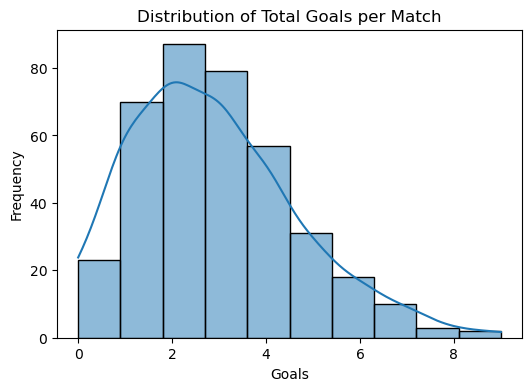

C:\Users\siddh\AppData\Local\Temp\ipykernel_41548\294386391.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="FTR", data=df, palette="Set2")


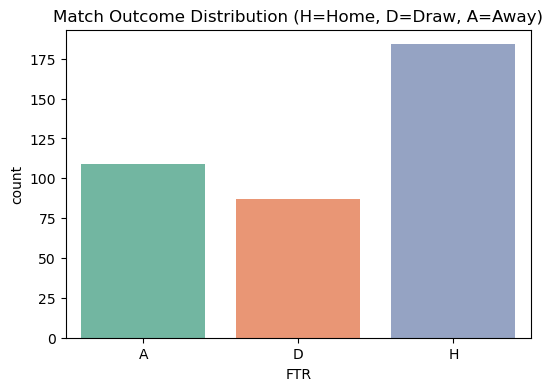

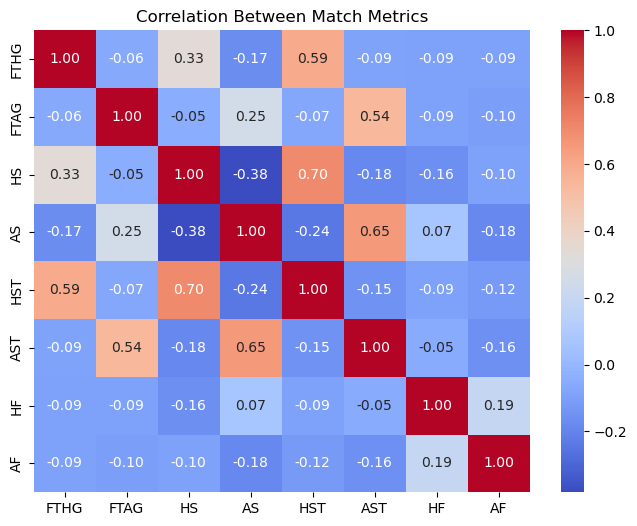

In [1]:
# =========================
# ReflexionPro Data Analysis
# Project 3 – Data Analysis Team
# =========================

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1. Load the dataset
# -------------------------
file_path = "2022-23data.csv"
df = pd.read_csv(file_path)

# -------------------------
# 2. Basic inspection
# -------------------------
print("Dataset shape:", df.shape)
print("Available columns:", df.columns[:20])  # showing first 20 for readability
print("\nFirst few rows:\n", df.head())

# -------------------------
# 3. Data Cleaning
# -------------------------
# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)

# Remove rows with missing results
df = df.dropna(subset=["FTR"])

# Ensure numeric fields are in the correct type
numeric_cols = ["FTHG", "FTAG", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# -------------------------
# 4. Exploratory Data Analysis
# -------------------------

# Match outcomes distribution
outcome_counts = df["FTR"].value_counts()
print("\nMatch Outcomes:\n", outcome_counts)

# Average goals per match
df["Total_Goals"] = df["FTHG"] + df["FTAG"]
avg_goals = df["Total_Goals"].mean()
print("\nAverage goals per match:", round(avg_goals, 2))

# Correlation matrix for performance metrics
metrics = ["FTHG", "FTAG", "HS", "AS", "HST", "AST", "HF", "AF"]
corr = df[metrics].corr()

# -------------------------
# 5. Visualizations
# -------------------------

# Goals distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Total_Goals"], bins=10, kde=True)
plt.title("Distribution of Total Goals per Match")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.show()

# Match outcome counts
plt.figure(figsize=(6,4))
sns.countplot(x="FTR", data=df, palette="Set2")
plt.title("Match Outcome Distribution (H=Home, D=Draw, A=Away)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Match Metrics")
plt.show()



Cross-Validation Accuracy (5-Fold):

Linear Regression:
 R² Scores: [0.252 0.411 0.37  0.157 0.258]
 Mean R² : 0.29
 Std Dev : 0.091
 MAE     : 1.177
 RMSE    : 1.5

Polynomial Regression (deg=2):
 R² Scores: [0.141 0.35  0.348 0.04  0.253]
 Mean R² : 0.226
 Std Dev : 0.121
 MAE     : 1.218
 RMSE    : 1.559

Support Vector Regression:
 R² Scores: [-0.257 -0.006 -0.393 -0.11  -0.04 ]
 Mean R² : -0.161
 Std Dev : 0.144
 MAE     : 1.451
 RMSE    : 1.901

Random Forest Regressor:
 R² Scores: [0.193 0.185 0.248 0.147 0.135]
 Mean R² : 0.182
 Std Dev : 0.04
 MAE     : 1.27
 RMSE    : 1.61


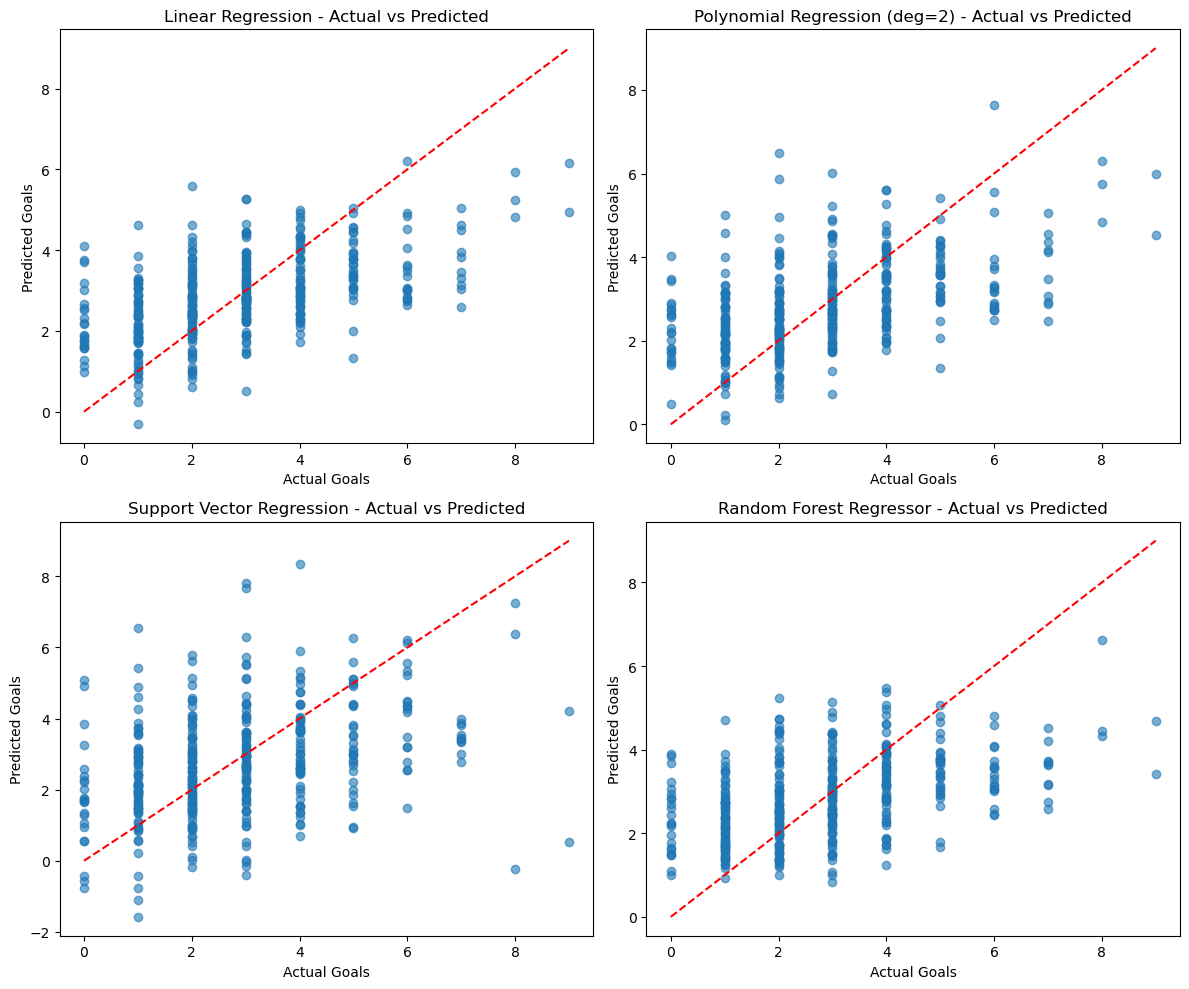

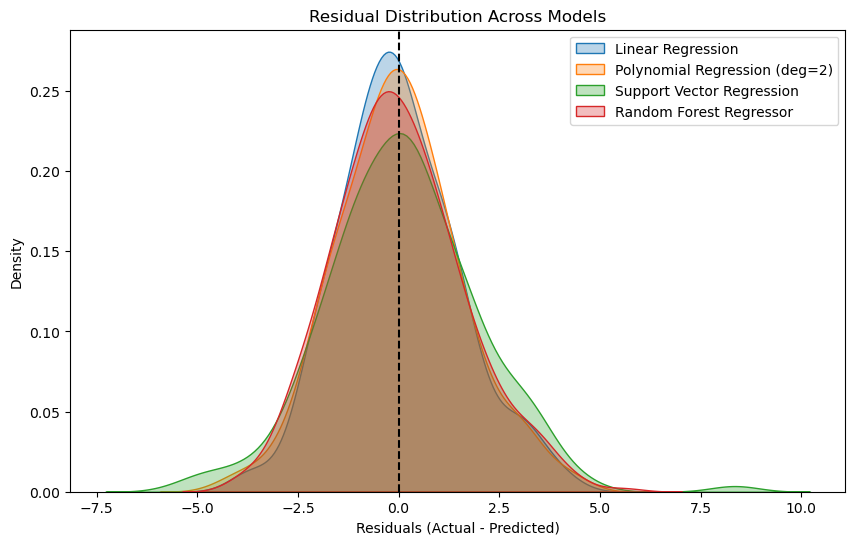

C:\Users\siddh\AppData\Local\Temp\ipykernel_41548\2249038641.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Residual", data=residuals_df, palette="Set2")


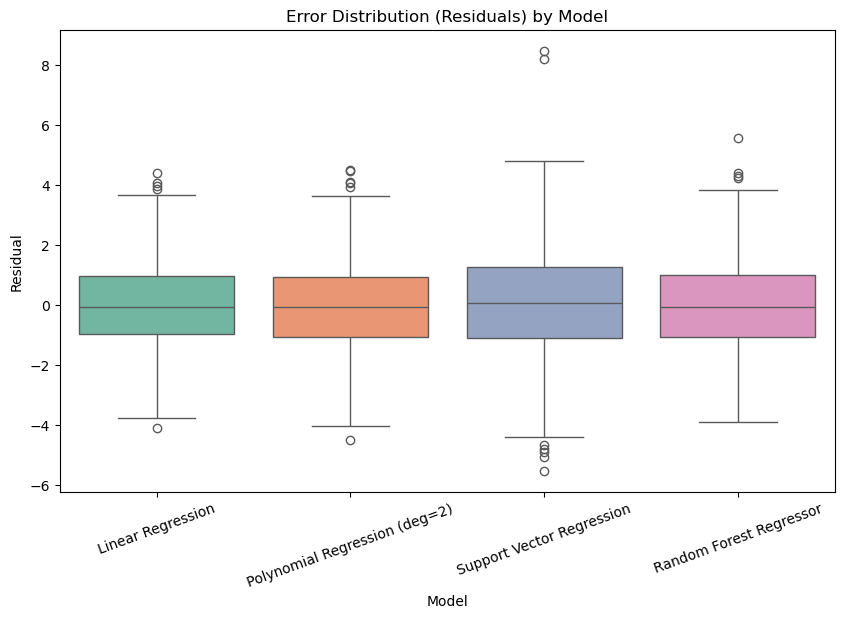

C:\Users\siddh\AppData\Local\Temp\ipykernel_41548\2249038641.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=[res["Mean R2"] for res in results.values()], palette="viridis")


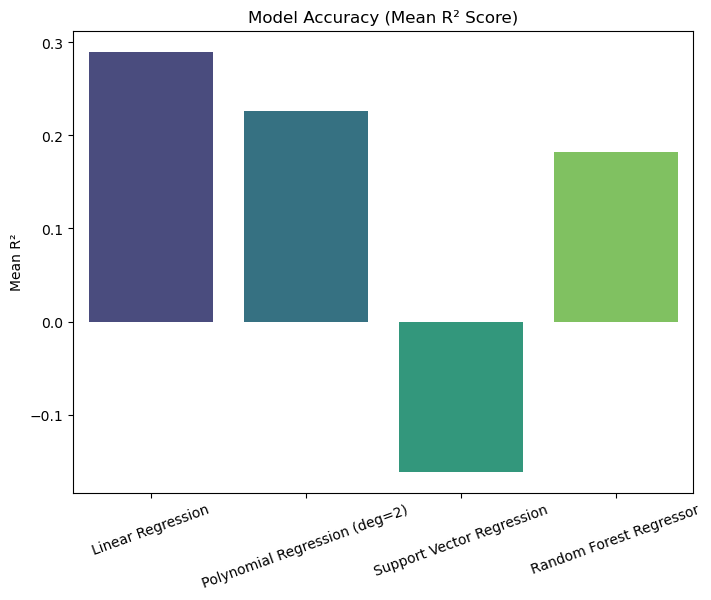

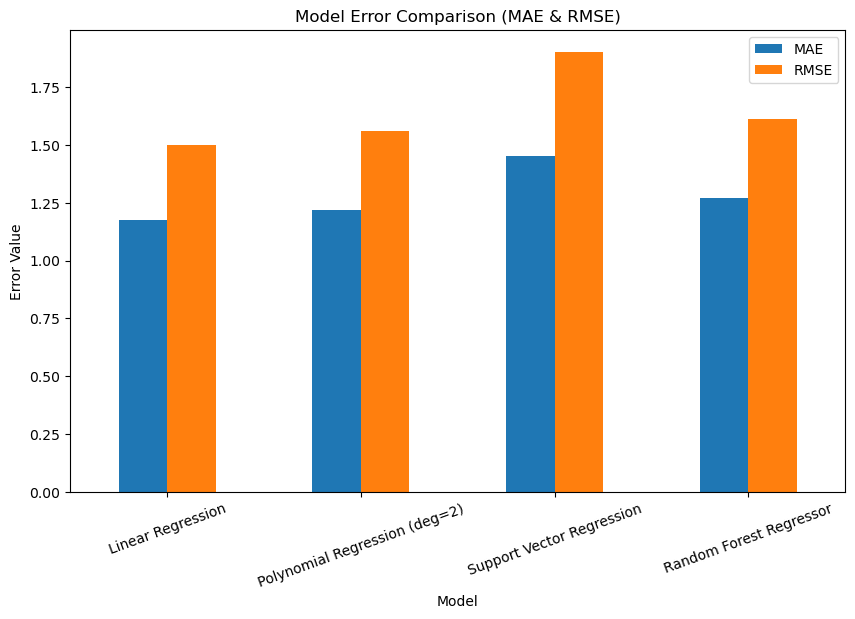

In [11]:
# =========================
# ReflexionPro - Predictive Modeling with Cross Validation + Visualization + Accuracy (R², MAE, RMSE)
# Based on Project 3 Data Analysis Team Manual
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -------------------------
# 1. Load dataset
# -------------------------
file_path = "2022-23data.csv"
df = pd.read_csv(file_path)

# -------------------------
# 2. Data Preparation
# -------------------------
numeric_cols = ["FTHG", "FTAG", "HS", "AS", "HST", "AST", "HF", "AF"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
df = df.dropna(subset=numeric_cols)

# Features (X) and Target (y)
X = df[["HS", "AS", "HST", "AST", "HF", "AF"]]
y = df["FTHG"] + df["FTAG"]

# Standardize features for models like SVR
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------
# 3. Define Models
# -------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (deg=2)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Support Vector Regression": SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------
# 4. Run Models with CV + Collect Predictions & Metrics
# -------------------------
results = {}
for name, model in models.items():
    # Cross-validation predictions
    y_pred = cross_val_predict(model, X_scaled, y, cv=kf)
    residuals = y - y_pred
    
    # Accuracy (R²)
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring="r2")
    
    # Error metrics
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))  # fixed for older sklearn
    
    results[name] = {
        "Predictions": y_pred,
        "Residuals": residuals,
        "R2 Scores": np.round(scores, 3),
        "Mean R2": round(np.mean(scores), 3),
        "Std Dev": round(np.std(scores), 3),
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3)
    }

# -------------------------
# 5. Print Accuracy Results
# -------------------------
print("\nCross-Validation Accuracy (5-Fold):")
for name, res in results.items():
    print(f"\n{name}:")
    print(" R² Scores:", res["R2 Scores"])
    print(" Mean R² :", res["Mean R2"])
    print(" Std Dev :", res["Std Dev"])
    print(" MAE     :", res["MAE"])
    print(" RMSE    :", res["RMSE"])

# -------------------------
# 6. Visualization
# -------------------------

# 1) Actual vs Predicted plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, res) in enumerate(results.items()):
    ax = axes[idx]
    ax.scatter(y, res["Predictions"], alpha=0.6)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
    ax.set_title(f"{name} - Actual vs Predicted")
    ax.set_xlabel("Actual Goals")
    ax.set_ylabel("Predicted Goals")

plt.tight_layout()
plt.show()

# 2) Residual distribution (KDE plots)
plt.figure(figsize=(10, 6))
for name, res in results.items():
    sns.kdeplot(res["Residuals"], label=name, fill=True, alpha=0.3)
plt.axvline(0, color="black", linestyle="--")
plt.title("Residual Distribution Across Models")
plt.xlabel("Residuals (Actual - Predicted)")
plt.legend()
plt.show()

# 3) Boxplot of residuals
residuals_df = pd.DataFrame({
    "Residual": np.concatenate([res["Residuals"] for res in results.values()]),
    "Model": np.concatenate([[name]*len(res["Residuals"]) for name, res in results.items()])
})

plt.figure(figsize=(10, 6))
sns.boxplot(x="Model", y="Residual", data=residuals_df, palette="Set2")
plt.title("Error Distribution (Residuals) by Model")
plt.xticks(rotation=20)
plt.show()

# 4) Bar chart of Mean R² scores
plt.figure(figsize=(8, 6))
sns.barplot(x=list(results.keys()), y=[res["Mean R2"] for res in results.values()], palette="viridis")
plt.title("Model Accuracy (Mean R² Score)")
plt.ylabel("Mean R²")
plt.xticks(rotation=20)
plt.show()

# 5) Bar chart of MAE and RMSE
errors_df = pd.DataFrame({
    "Model": list(results.keys()),
    "MAE": [res["MAE"] for res in results.values()],
    "RMSE": [res["RMSE"] for res in results.values()]
})

errors_df.plot(x="Model", kind="bar", figsize=(10,6))
plt.title("Model Error Comparison (MAE & RMSE)")
plt.ylabel("Error Value")
plt.xticks(rotation=20)
plt.show()


 Football Match Prediction: Cross-Validation Report 

Fold 1 Accuracy: 0.4737 (47.4%)
Fold 2 Accuracy: 0.5263 (52.6%)
Fold 3 Accuracy: 0.5526 (55.3%)
Fold 4 Accuracy: 0.5395 (53.9%)
Fold 5 Accuracy: 0.5395 (53.9%)

Average Accuracy Across Folds: 0.5263 (52.6%)

Sample of Prepared Dataset:
   H_Ranking_Prior_Season  A_Ranking_Prior_Season FTR  FTR_Num
0                      12                       5   A        0
1                      18                       2   D        1
2                      18                      14   H        2
3                      17                      10   H        2
4                      11                      18   H        2


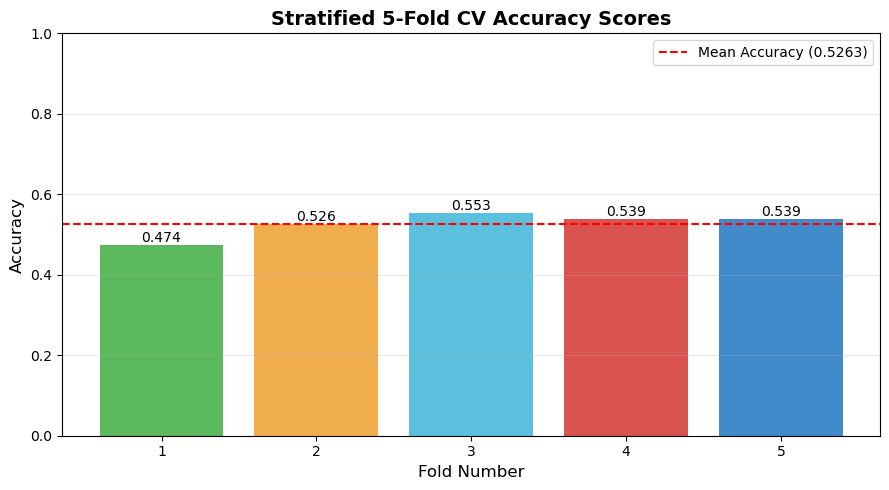

In [17]:
# ==============================
# Stratified K-Fold Validation for Football Match Outcome Prediction
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Import dataset
data = pd.read_csv("2022-23data.csv")

# Step 2: Extract relevant columns and remove missing entries
data_clean = data[['H_Ranking_Prior_Season', 'A_Ranking_Prior_Season', 'FTR']].dropna().reset_index(drop=True)

# Step 3: Convert categorical results to numerical labels
encoder = LabelEncoder()
data_clean['FTR_Num'] = encoder.fit_transform(data_clean['FTR'])

# Step 4: Define input features and target variable
features = data_clean[['H_Ranking_Prior_Season', 'A_Ranking_Prior_Season']]
target = data_clean['FTR_Num']

# Step 5: Setup stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_reg_model = LogisticRegression(max_iter=1000)

fold_accuracies = []

print(" Football Match Prediction: Cross-Validation Report \n")

# Step 6: Perform cross-validation and record accuracies
for i, (train_idx, test_idx) in enumerate(cv.split(features, target), start=1):
    X_train, X_test = features.iloc[train_idx], features.iloc[test_idx]
    y_train, y_test = target.iloc[train_idx], target.iloc[test_idx]
    
    log_reg_model.fit(X_train, y_train)
    predictions = log_reg_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    fold_accuracies.append(accuracy)
    
    print(f"Fold {i} Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")

# Step 7: Calculate and display average accuracy
mean_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy Across Folds: {mean_accuracy:.4f} ({mean_accuracy*100:.1f}%)")

# Step 8: Preview of cleaned data (first 5 rows)
print("\nSample of Prepared Dataset:")
print(data_clean.head())

# Step 9: Visualize fold accuracies with bar chart
plt.figure(figsize=(9, 5))
bar_colors = ['#5cb85c', '#f0ad4e', '#5bc0de', '#d9534f', '#428bca']
bars = plt.bar(range(1, 6), fold_accuracies, color=bar_colors)
plt.axhline(y=mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy ({mean_accuracy:.4f})')

# Annotate bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')

plt.title('Stratified 5-Fold CV Accuracy Scores', fontsize=14, fontweight='bold')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.xticks(range(1, 6))
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [7]:
# K-Fold Cross Validation for Football Match Outcome Prediction
# Written in plain human language comments to explain each step.

import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
# Replace the filename with your dataset's actual name if different
data = pd.read_csv("2022-23data.csv")

# Step 2: Select relevant features and target
# Assumes the dataset has columns like 'HomeTeam', 'AwayTeam', 'FTR' (Full Time Result)
# FTR usually means H = Home win, D = Draw, A = Away win
features = ['HomeTeam', 'AwayTeam']
target = 'FTR'

# Step 3: Convert text labels to numbers for model compatibility
label_enc = LabelEncoder()
for col in features:
    data[col] = label_enc.fit_transform(data[col])
data[target] = label_enc.fit_transform(data[target])

# Step 4: Define input (X) and output (y) data
X = data[features]
y = data[target]

# Step 5: Set up the K-Fold Cross Validation
# Here, n_splits=5 means we split data into 5 parts
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 6: Choose a model (Logistic Regression for classification)
model = LogisticRegression(max_iter=1000)

# Step 7: Evaluate the model using Cross Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Step 8: Print results
print("K-Fold Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())


K-Fold Accuracy Scores: [0.46052632 0.55263158 0.52631579 0.39473684 0.47368421]
Average Accuracy: 0.48157894736842105
